In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression


In [10]:
Data= pd.read_csv('Analysis.csv', index_col = 'Genotypes')
Data.head()

,Unnamed: 0,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
Genotypes,,,,,,,,,,,,,,,,,,
(Gulabi X B’lore Purple),0,0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
Alden,1,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
Aledo,2,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
Amber Sweet,3,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
Arka Chitra,4,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [11]:
Data= Data[['PruningBiomass', 'TimeofBudbrust', 
       'Timeoffullbloom', 'Time of verasion', 'ABW', 'BW', 'BD', 'BL',
       'Acidity', 'Compaactness', 'Skinfirmness', ]]

In [12]:
Data.head()

,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,Acidity,Compaactness,Skinfirmness
Genotypes,,,,,,,,,,,
(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,0.566667,5.550000,60.966667
Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,0.716667,8.446667,40.700000
Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,0.666667,5.560000,51.200000
Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,0.553333,3.820000,38.233333
Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,0.746667,2.793333,52.643333


In [13]:
Data.describe()

,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,Acidity,Compaactness,Skinfirmness
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.760596,10.626667,34.857778,104.106667,263.031556,118.669467,15.038978,16.574044,0.654800,5.093022,51.574711
std,0.520205,1.526503,2.833293,5.619079,134.424930,51.024063,2.241753,2.659764,0.102303,2.014155,8.576903
min,0.048667,8.000000,28.666667,91.000000,35.660000,41.276667,10.800000,12.033333,0.436667,2.296667,31.766667
25%,0.447333,9.333333,33.333333,100.833333,152.963333,78.481667,13.416667,14.505000,0.583333,3.556667,46.083333
50%,0.683667,10.333333,35.000000,103.666667,257.960000,105.490000,14.600000,16.633333,0.650000,4.503333,51.733333
75%,0.924833,12.000000,37.000000,106.000000,360.283333,157.430000,16.550000,18.433333,0.718333,6.330000,56.906667
max,2.643667,14.333333,40.666667,131.000000,558.933333,254.250000,21.333333,23.666667,0.990000,10.306667,71.666667


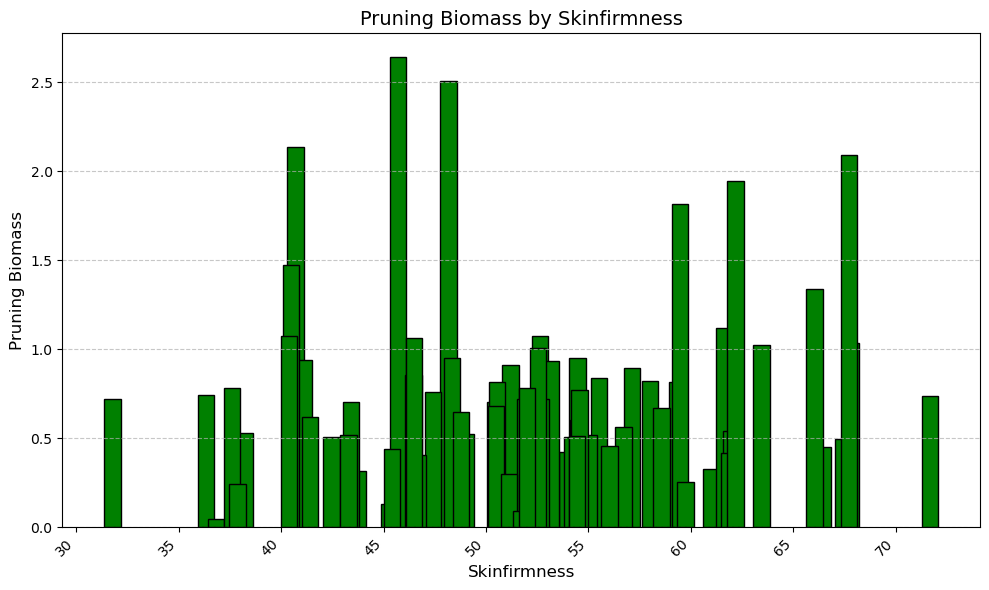

In [75]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Data['Skinfirmness'], Data['PruningBiomass'], color='green', edgecolor='black')

# Adding titles and labels
plt.title('Pruning Biomass by Skinfirmness', fontsize=14)
plt.xlabel('Skinfirmness', fontsize=12)
plt.ylabel('Pruning Biomass', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig('Barchart', dpi=300) 
plt.show()

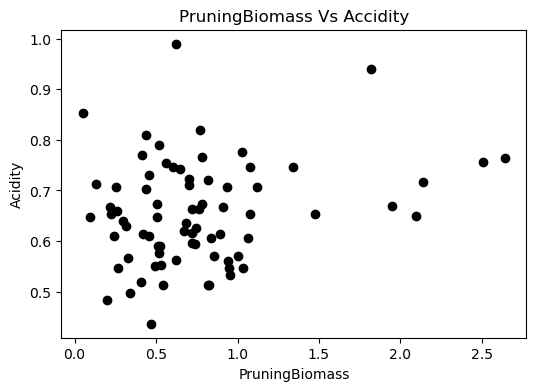

In [77]:
plt.figure(figsize =(6, 4))
plt.scatter(Data['PruningBiomass'], Data['Acidity'], color='black', alpha=1,)
plt.xlabel('PruningBiomass')
plt.ylabel('Acidity')
plt.title('PruningBiomass Vs Accidity')
plt.savefig('Scattered', dpi=300)
plt.show()

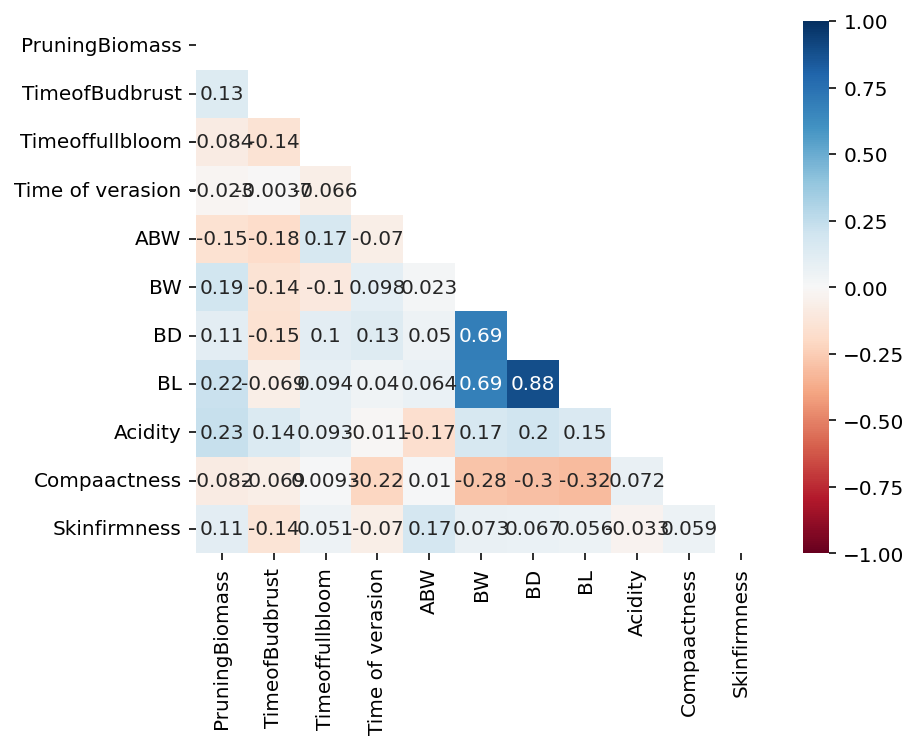

In [79]:
fig, ax = plt.subplots(dpi=144)
mask = np.triu(np.ones_like(Data.corr()))
sns.heatmap(Data.corr(), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True,
mask=mask)
plt.savefig('Heatmap', dpi=300)
plt.show()

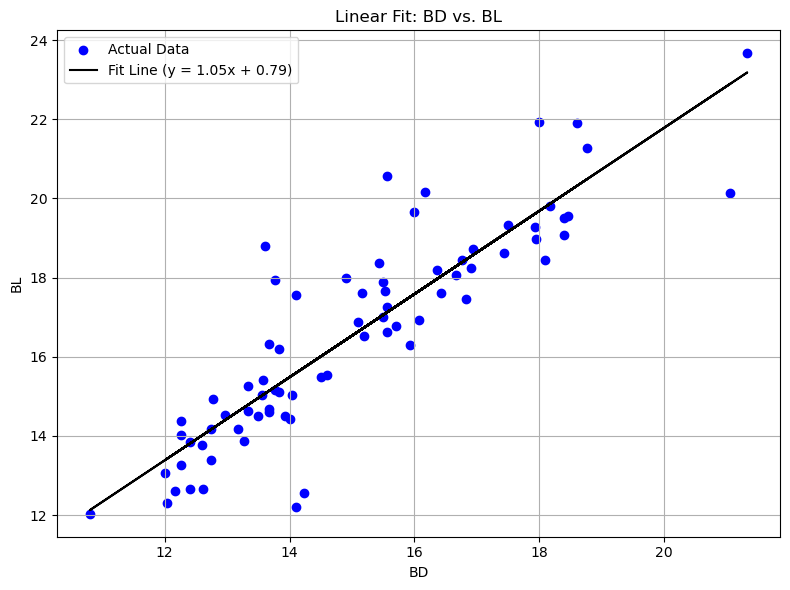

Equation of the line: y = 1.05x + 0.79


In [81]:
X= Data['BD'].values.reshape(-1, 1)
y = Data['BL'].values  
, cov = curve_fit(linfunc, x, y)
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='black', label=f'Fit Line (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')  # Regression line

# Add labels and title
plt.title('Linear Fit: BD vs. BL')
plt.xlabel('BD')
plt.ylabel('BL')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.savefig('fitting1', dpi=300)
plt.show()

# Print the equation of the line
print(f"Equation of the line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

In [34]:
def exponential(t, n0, g):
        """
        Calculates exponential function with scale factor n0 and growth rate g.
        """
        f = n0 * np.exp(g*t)
        return f

In [38]:
# let's normalise the time frame, quite important for exponentials
numeric_index = (Data.BD ).values
# give some initial guesses of N0 and growth
p, cov = curve_fit(exponential, numeric_index, Data['BD'],
                   p0=(1.2e12, 0.03))

# get uncertainties on each parameter
sigma = np.sqrt(np.diag(cov))

print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
print(f"g = {p[1]:.2f} +/- {sigma[1]:.2f}")


NameError: name 'curve_fit' is not defined

NameError: name 'p' is not defined

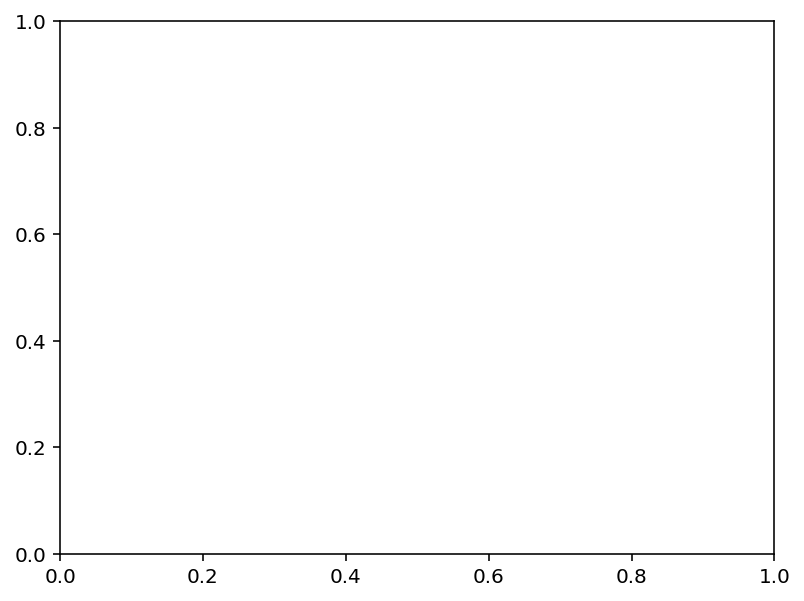

In [130]:
fig, ax = plt.subplots(dpi=144)
Data['Exponential Fit'] = exponential(numeric_index, *p)
Data.plot(y=['BL', 'Exponential Fit'], logy=True, ax=ax, ylabel='BD')
plt.savefig('F', dpi=300)
plt.show()


In [132]:
def polynomial_fitting(Data, degree=3): """ Fits a polynomial curve to the relationship between 'Time of verasion' and 'PruningBiomass' """ # Extract x and y from the DataFrame x = Data['Time of verasion'].values y = Data['PruningBiomass'].values # Normalize x and y x_norm = (x - x.mean()) / x.std() y_norm = (y - y.mean()) / y.std() # Fit polynomial coefficients = np.polyfit(x_norm, y_norm, degree) polynomial_model = np.poly1d(coefficients) # Generate fitted values y_polynomial = polynomial_model(x_norm) # Sort the x values for a smooth curve plotting x_sorted = np.sort(x_norm) y_polynomial_sorted = polynomial_model(x_sorted) # Calculate residuals and standard error for confidence interval residuals = y_norm - y_polynomial std_error = np.std(residuals) confidence_interval = 1.96 * std_error # Plot the original data and the fitted curve plt.style.use('seaborn') plt.figure(figsize=(10, 8)) plt.scatter(x_norm, y_norm, label='Actual Data', alpha=0.8, color='green') plt.plot(x_sorted, y_polynomial_sorted, color='blue', label='Polynomial fit') plt.fill_between(x_sorted, y_polynomial_sorted - confidence_interval, y_polynomial_sorted + confidence_interval, color='blue', alpha=0.2, label='Confidence Interval') # Customize the plot plt.title('Polynomial Fit and Confidence Interval') plt.xlabel('Time of verasion', fontsize=14)


Data clustering


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

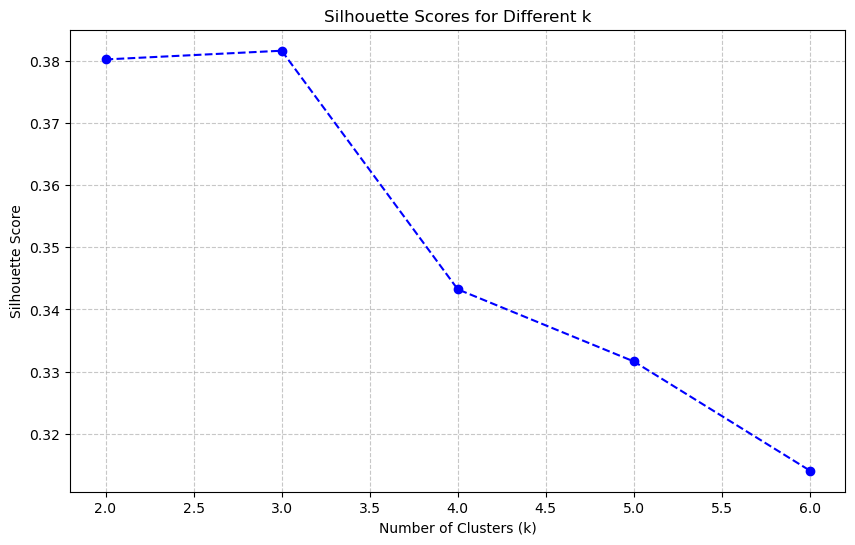

                          PruningBiomass  TimeofBudbrust  Timeoffullbloom  \
Genotypes                                                                   
(Gulabi X B’lore Purple)        0.327667        9.000000        38.333333   
Alden                           2.137667       10.000000        35.333333   
Aledo                           0.912667       10.666667        39.666667   
Amber Sweet                     0.528667       10.000000        36.333333   
Arka Chitra                     1.075667       10.000000        35.000000   
...                                  ...             ...              ...   
 E-8-25                         0.517000       12.333333        34.666667   
 SV-12309                       0.253667       12.000000        36.000000   
 SV-12364                       0.514333       13.333333        32.666667   
 SV-18402                       0.670000       11.000000        31.000000   
 SV-23501                       0.785000        9.000000        31.333333   

In [91]:
#Select features for clustering
features = Data[['ABW', 'BW', 'BD']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using silhouette scores
k_values = range(2, 7)  # Test k values from 2 to 6
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_scaled, cluster_labels))

# Plot silhouette scores to decide optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()
print(Data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


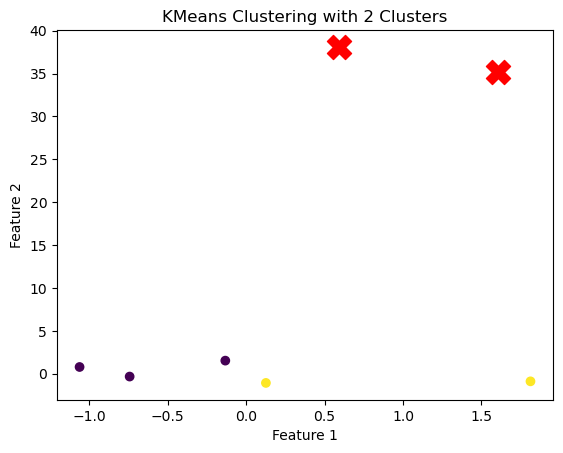

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


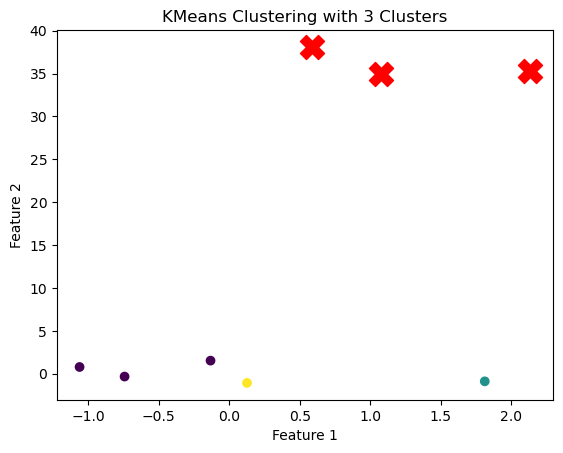

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


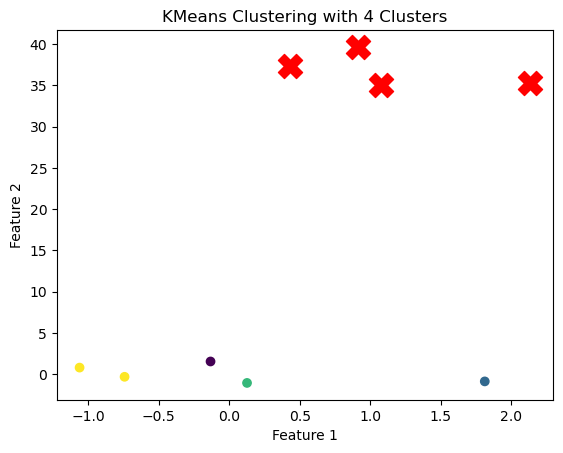

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


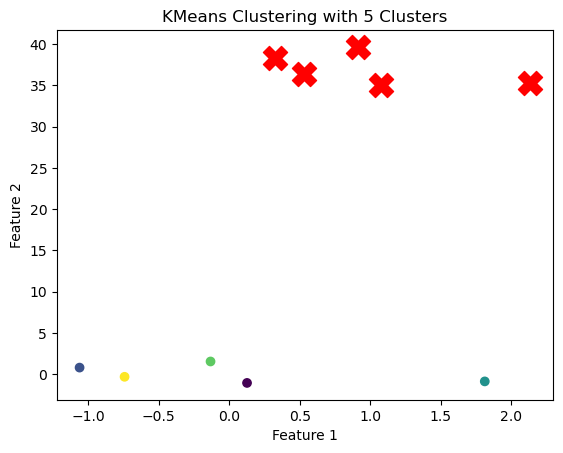

ValueError: n_samples=5 should be >= n_clusters=6.

In [126]:
# Normalize the data
norm = scaler.fit_transform(data)

# Example of using KMeans
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)
    labels = kmeans.labels_  # Correct attribute is labels_

    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)

    # Plotting
    plt.scatter(norm[:, 0], norm[:, 1], c=labels, cmap='viridis')
    plt.scatter(cen[:, 0], cen[:, 1], s=300, c='red', marker='X')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KMeans Clustering with {k} Clusters')
    plt.show()


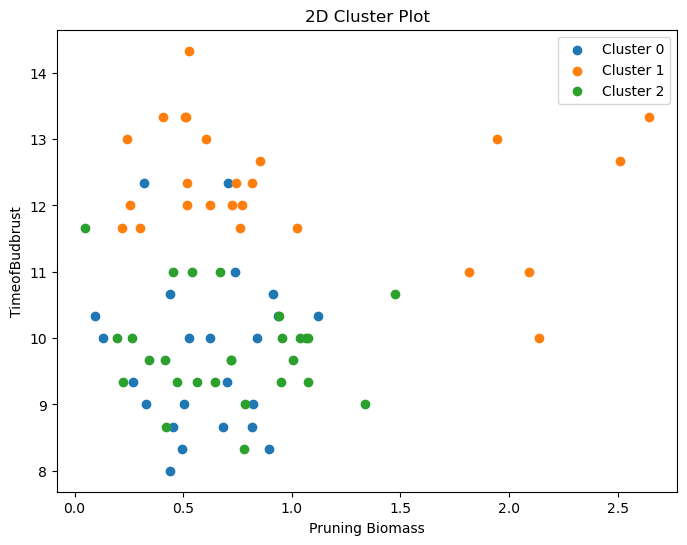

KeyError: 'SkinFirmness'

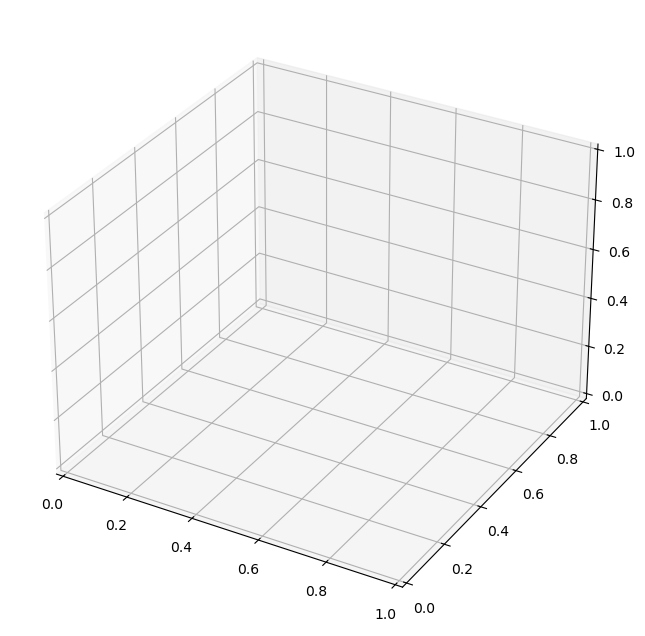

In [103]:
plt.figure(figsize=(8, 6))
for cluster in Data['Cluster'].unique():
    cluster_data = Data[Data['Cluster'] == cluster]
    plt.scatter(cluster_data['PruningBiomass'], cluster_data['TimeofBudbrust'], label=f'Cluster {cluster}')

plt.xlabel('Pruning Biomass')
plt.ylabel('TimeofBudbrust')
plt.title('2D Cluster Plot')
plt.legend()
plt.show()

# 3D Scatter Plot (if 3 features are visualized)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in Data['Cluster'].unique():
    cluster_data = Data[Data['Cluster'] == cluster]
    ax.scatter(cluster_data['PruningBiomass'], cluster_data['TimeofBudbrust'], cluster_data['SkinFirmness'], label=f'Cluster {cluster}')

ax.set_xlabel('Pruning Biomass')
ax.set_ylabel('TimeofBudbrust')
ax.set_zlabel('Skin Firmness')
ax.set_title('3D Cluster Plot')
ax.legend()
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def plot_elbow_method(Data):
    """
    Plots the elbow method to find the optimal number of clusters
    """

    # Select the features for clustering
    features_clust = Data['PruningBiomass', 'TimeofBudbrust', 'Timeoffullbloom']

    # Normalize the data using StandardScaler
    scaler = StandardScaler()
    normalized = scaler.fit_transform(features_clust) 

    # Initialize a list to store WCSS values
    wcss = []

    # Define the range of cluster numbers (1 to 10)
    n_range = range(1, 11)

    # Iterate over the range of cluster numbers and calculate WCSS (Within-Cluster Sum of Squares)
    for n in n_range:
        kmeans = KMeans(n_clusters=n, random_state=32)
        kmeans.fit(normalized)  # Fit the KMeans model
        wcss.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.style.use('ggplot')
    plt.figure(figsize=(8, 6))  # Adjust the figure size
    plt.plot(n_range, wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('WCSS (Inertia)', fontsize=14)
    plt.title('Elbow Method for Best Number of Clusters', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)  # Fix any typographical error
    
    plt.show()  

In [153]:
def polynomial_fitting(Data, degree=3): 
    """ 
    Fits a polynomial curve to the relationship between 'Time of verasion' and 'PruningBiomass' 
    """ 
# Extract x and y from the DataFrame 
    x = Data['Time of verasion'].values
    y = Data['PruningBiomass'].values # Normalize x and y x_norm = (x - x.mean()) / x.std() y_norm = (y - y.mean()) / y.std() 

    # Normalize x and y
    x_norm = (x - x.mean()) / x.std()
    y_norm = (y - y.mean()) / y.std() 
    # Fit polynomial
    coefficients = np.polyfit(x_norm, y_norm, degree) 
    polynomial_model = np.poly1d(coefficients) 
    
# Generate fitted values 
    y_polynomial = polynomial_model(x_norm) 
#Sort the x values for a smooth curve plotting 
    x_sorted = np.sort(x_norm) 
    y_polynomial_sorted = polynomial_model(x_sorted)
# Calculate residuals and standard error for confidence interval 
    residuals = y_norm - y_polynomial 
    std_error = np.std(residuals) 
    confidence_interval = 1.96 * std_error*std_error 
# Plot the original data and the fitted curve  
plt.figure(figsize=(10, 8))
plt.scatter(x, y, label='Actual Data', alpha=0.8, color='green')
plt.plot(x_sorted, y_polynomial_sorted, color='blue', label='Polynomial fit')
plt.fill_between(x_sorted, y_polynomial_sorted - confidence_interval, y_polynomial_sorted + confidence_interval, color='blue', alpha=0.2, label='Confidence Interval')

# Customize the plot
plt.title('Polynomial Fit and Confidence Interval') 
plt.xlabel('Time of verasion', fontsize=14) 
plt.ylabel('PruningBiomass', fontsize=14) 
plt.legend() 
plt.show()


NameError: name 'x_sorted' is not defined

<Figure size 1000x800 with 0 Axes>

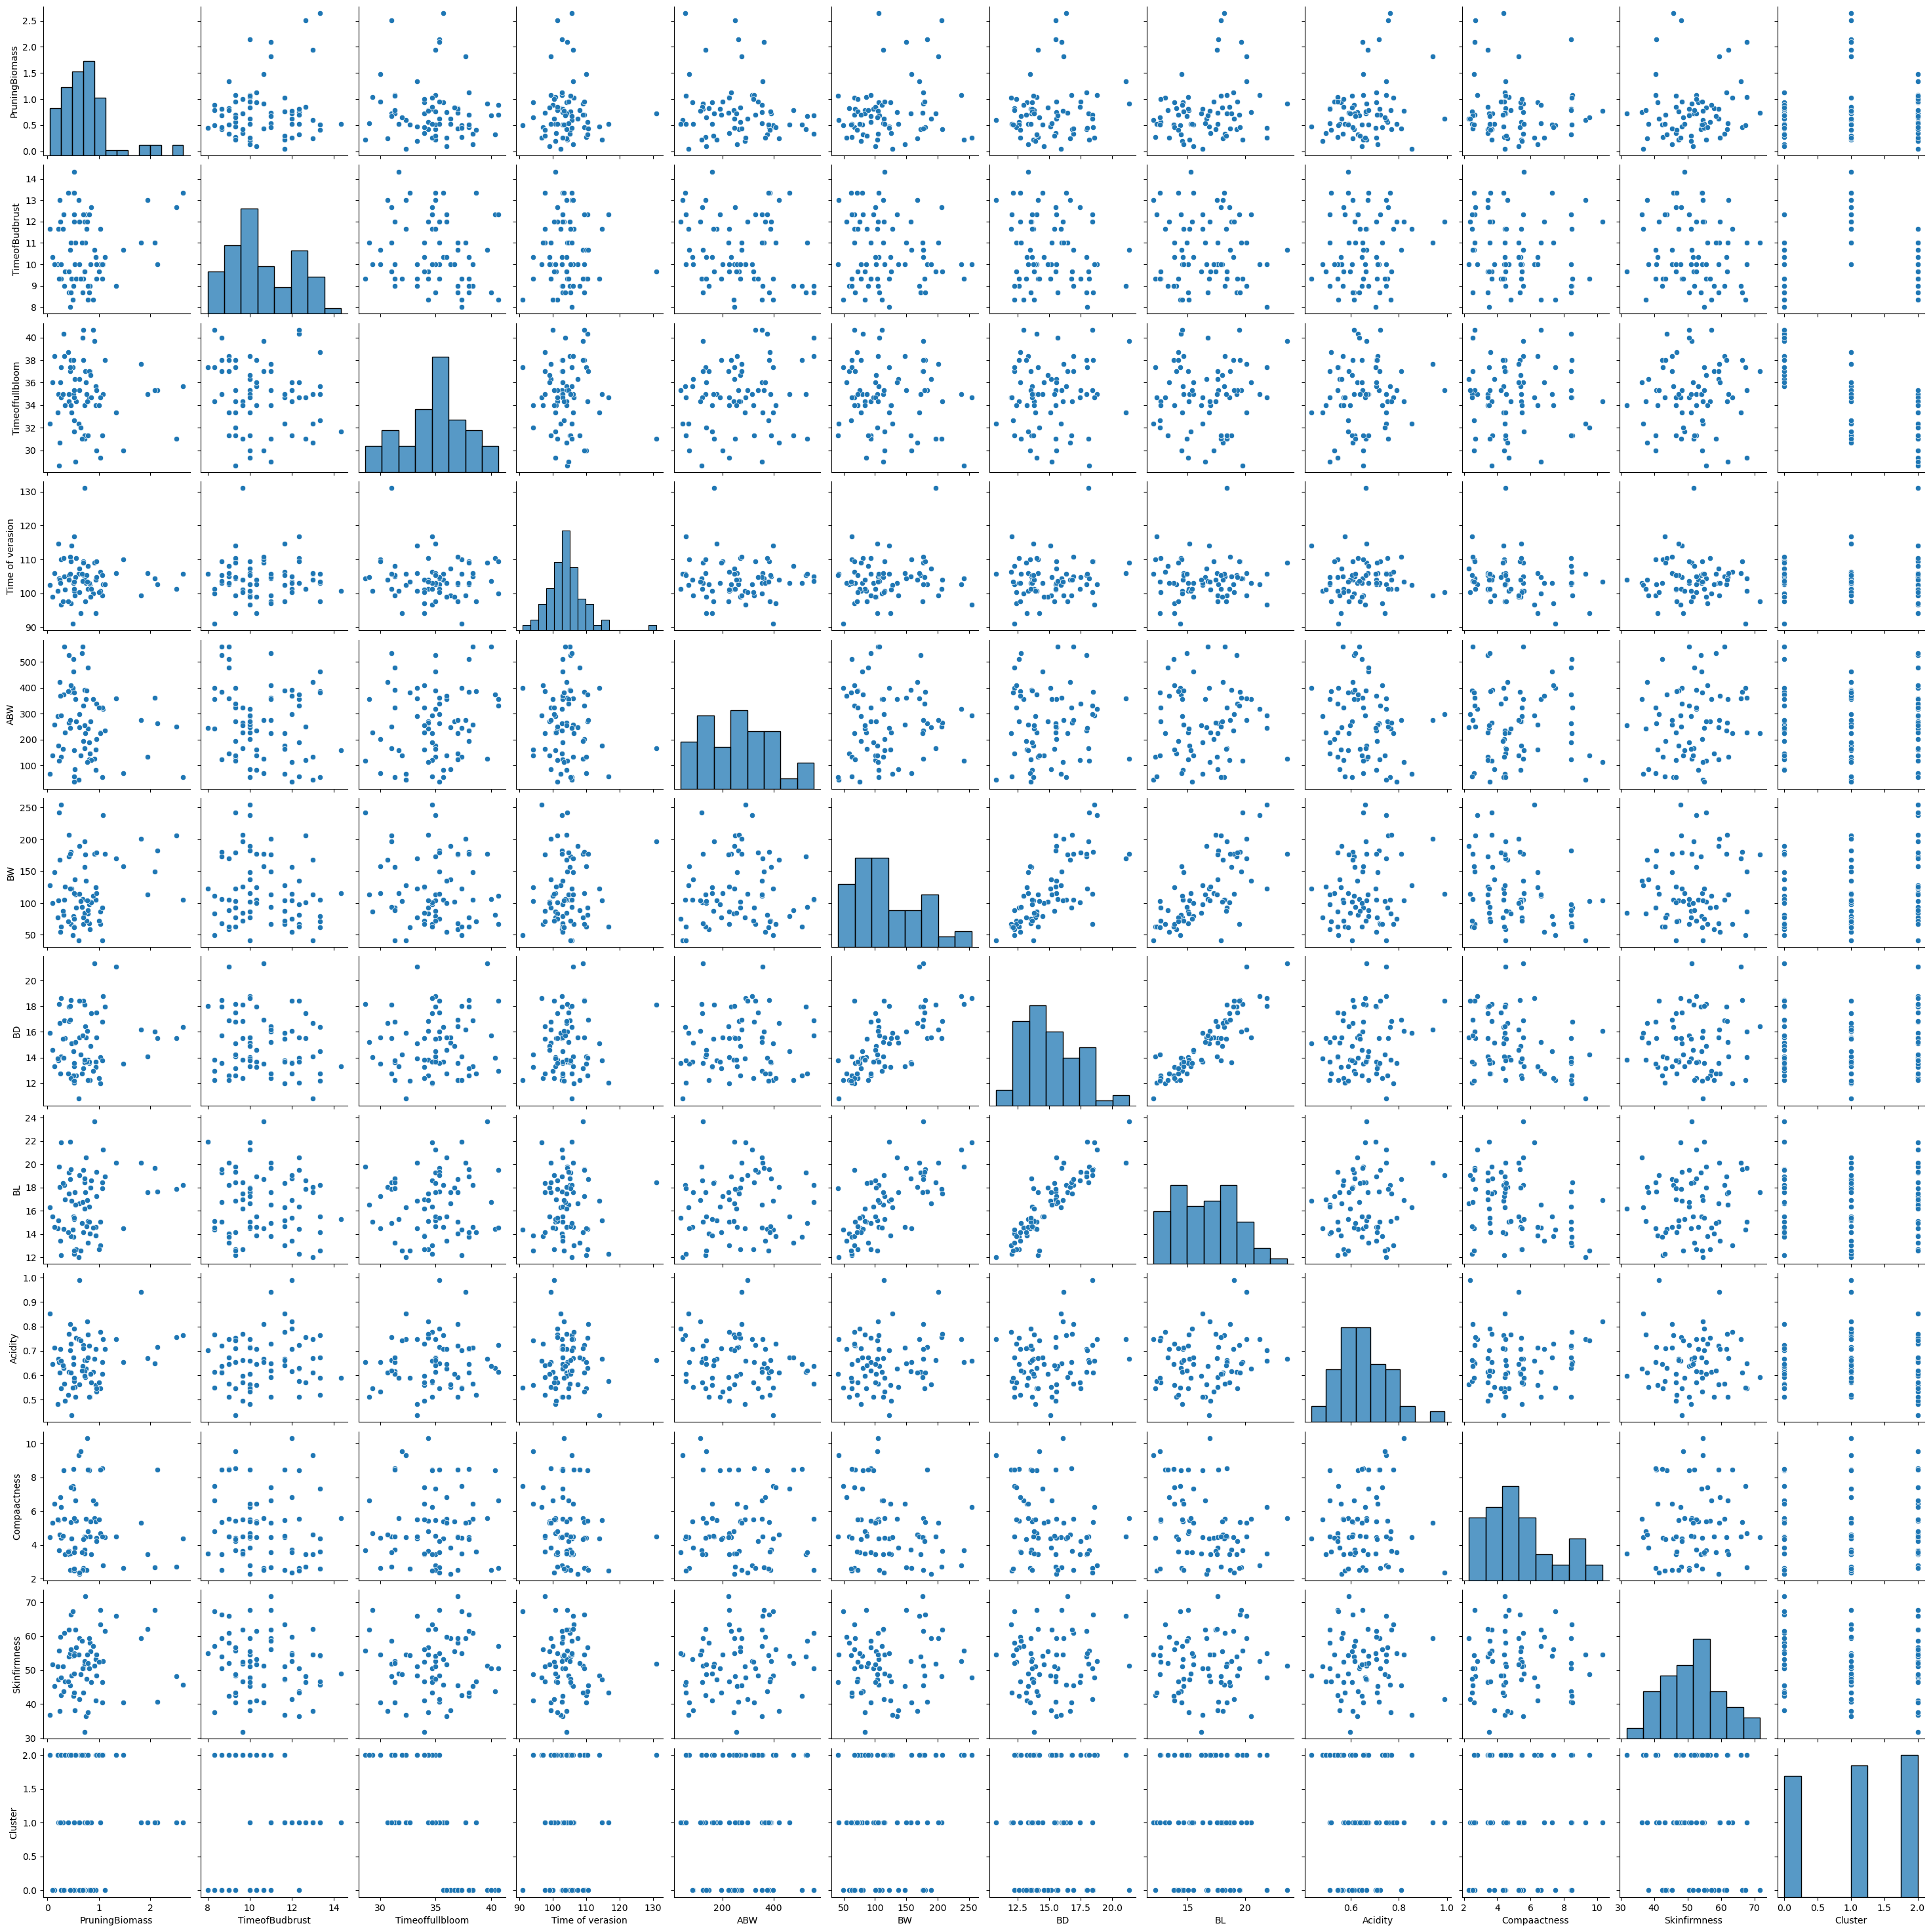

In [145]:
sns.pairplot(Data)
plt.show()

Mean:
 PruningBiomass        0.760596
TimeofBudbrust       10.626667
Timeoffullbloom      34.857778
Time of verasion    104.106667
ABW                 263.031556
BW                  118.669467
BD                   15.038978
BL                   16.574044
Acidity               0.654800
Compaactness          5.093022
Skinfirmness         51.574711
dtype: float64

Median:
 PruningBiomass        0.683667
TimeofBudbrust       10.333333
Timeoffullbloom      35.000000
Time of verasion    103.666667
ABW                 257.960000
BW                  105.490000
BD                   14.600000
BL                   16.633333
Acidity               0.650000
Compaactness          4.503333
Skinfirmness         51.733333
dtype: float64

Standard Deviation:
 PruningBiomass        0.520205
TimeofBudbrust        1.526503
Timeoffullbloom       2.833293
Time of verasion      5.619079
ABW                 134.424930
BW                   51.024063
BD                    2.241753
BL                    2.659764
A

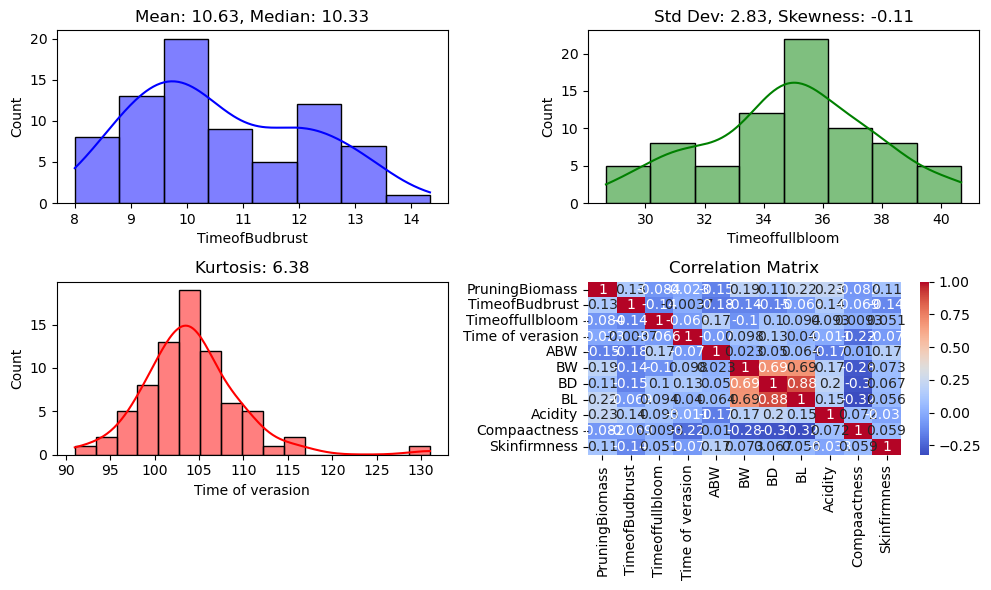

In [49]:
# Function to show statistical depth
def show_statistical_depth():
    """
    Shows statistical depth including mean, median, standard deviation, skewness, kurtosis, correlation matrix, and basic descriptive statistics.
    """
    numeric_Data = Data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate major moments
    mean = numeric_Data.mean()
    median = numeric_Data.median()
    std_dev = numeric_Data.std()
    skewness = numeric_Data.skew()
    kurtosis = numeric_Data.kurtosis()
    
    # Display major moments
    print("Mean:\n", mean)
    print("\nMedian:\n", median)
    print("\nStandard Deviation:\n", std_dev)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)
    
    # Display correlation matrix
    print("\nCorrelation Matrix:\n", numeric_Data.corr())
    
    # Plot major moments
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(numeric_Data['TimeofBudbrust'], kde=True, color='blue')
    plt.title(f'Mean: {mean["TimeofBudbrust"]:.2f}, Median: {median["TimeofBudbrust"]:.2f}')
    
    plt.subplot(2, 2, 2)
    sns.histplot(numeric_Data['Timeoffullbloom'], kde=True, color='green')
    plt.title(f'Std Dev: {std_dev["Timeoffullbloom"]:.2f}, Skewness: {skewness["Timeoffullbloom"]:.2f}')
    
    plt.subplot(2, 2, 3)
    sns.histplot(numeric_Data['Time of verasion'], kde=True, color='red')
    plt.title(f'Kurtosis: {kurtosis["Time of verasion"]:.2f}')
    
    plt.subplot(2, 2, 4)
    sns.heatmap(numeric_Data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    
    plt.tight_layout()
    plt.show()

show_statistical_depth()